Instalando dependências do Spark

In [ ]:
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark
     

Importando OS

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
     


Importando o Spark Session

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .getOrCreate()

In [ ]:
spark

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carregando dados no dataframe

In [15]:
data = spark.read.parquet('/content/drive/MyDrive/dados/anuncio_tratado_parquet/part-00000-b202265d-8cd3-46a3-8036-abcc95378363-c000.snappy.parquet')


In [16]:
data.show(10)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+--------------+------------+----------+----+-----+-----+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|        bairro|        zona|condominio|iptu| tipo|valor|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+--------------+------------+----------+----+-----+-----+
|    0|      null|       16|        0|                  []|{Centro, 20061003...|47d553e0-79f2-4a4...|      0|     0|       Usado|      Outros|  Comercial|   1|[{260, 107, Venda...|        Centro|Zona Central|       260| 107|Venda|10000|
|    0|      null|       14|        0|              

# Seleção de features

In [17]:
# para selecionar as features utiliza-se o método distinct() a fim de obter os valores únicos para cada coluna do dataframe, num primeiro momento suspeita-se
# das colunas tipo_anuncio, tipo_uso e tipo.

# Coluna tipo_anuncio

In [18]:
data.select('tipo_anuncio').distinct().show()

+------------+
|tipo_anuncio|
+------------+
|       Usado|
|  Lançamento|
+------------+



todos os dados da coluna tipo_anuncio são iguais: "Usado"
     
#Coluna tipo_uso

In [19]:
data.select('tipo_uso').distinct().show()

+-----------+
|   tipo_uso|
+-----------+
|  Comercial|
|Residencial|
+-----------+



todos os dados da coluna tipo_uso são iguais: "Residencial"
     
#Coluna tipo_unidade

In [20]:
data.select('tipo_unidade').distinct().show()

+------------+
|tipo_unidade|
+------------+
|      Outros|
| Apartamento|
|        Casa|
+------------+



# Coluna tipo

In [21]:
data.select('tipo').distinct().show()  

+-------+
|   tipo|
+-------+
|Aluguel|
|  Venda|
+-------+



todos os dados da coluna tipo são iguais: "Venda"
     
#Drop das colunas tipo_anuncio, tipo_uso, tipo_unidade e tipo

In [22]:
# como as colunas citadas acima possuem apenas uma única informação, podem ser eliminadas do dataframe a fim de deixar apenas dados mais significativos:

data = data.drop('tipo_anuncio')
data = data.drop('tipo_uso')
data = data.drop('tipo_unidade')
data = data.drop('tipo')
data.show(5)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+----+-----+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|vaga|             valores|        bairro|        zona|condominio|iptu|valor|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+----+-----+
|    0|      null|       16|        0|                  []|{Centro, 20061003...|47d553e0-79f2-4a4...|      0|     0|   1|[{260, 107, Venda...|        Centro|Zona Central|       260| 107|10000|
|    0|      null|       14|        0|                  []|{Centro, 20051040...|b6ffbae1-17f6-487...|      0|  null|   0|[{260, 107, Venda...|        Centro|Zona Central|       260| 107|10000|
|    0|      1026|     1026|       

# Colunas area_total e area_util

In [23]:
# contando os valores da coluna area_total:

data.select('area_total').groupBy('area_total').count().show()

+----------+-----+
|area_total|count|
+----------+-----+
|       148|  266|
|     14570|    1|
|      1645|    1|
|       463|    4|
|       496|    3|
|      5300|    1|
|      1342|    1|
|       471|    1|
|      2122|    1|
|       243|   23|
|       540|   44|
|      1896|    1|
|       392|   13|
|      1460|    1|
|       858|    1|
|       897|    2|
|      1025|    1|
|       623|    3|
|      3475|    1|
|        31|   92|
+----------+-----+
only showing top 20 rows



In [24]:
# contando os valores area_util:

data.select('area_util').groupBy('area_util').count().show()

+---------+-----+
|area_util|count|
+---------+-----+
|      148|  321|
|      496|    3|
|      463|    7|
|     1580|    1|
|     5300|    1|
|      471|    1|
|      243|   29|
|      540|   49|
|     1896|    1|
|      392|   14|
|      737|    1|
|     8932|    1|
|      858|    2|
|      897|    1|
|      623|    5|
|     3475|    1|
|     1460|    1|
|       31|  112|
|     3000|   27|
|      516|    4|
+---------+-----+
only showing top 20 rows




apesar de existirem vários valores que se repetem, visualizando-os de maneira mais ampla vemos que estes são abrangentes e não podem ser descartados.
     

para contar os valores nulos nas colunas area_total e area_util temos que:


In [25]:
from pyspark.sql.functions import col, isnan, when, count, lit, explode, array_contains, size, isnull, array

In [26]:
null_area = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.select(['area_total', 'area_util']).columns])
null_area.show()


+----------+---------+
|area_total|area_util|
+----------+---------+
|     12595|       13|
+----------+---------+



In [ ]:
# Convertendo os tipos das colunas

In [27]:
from pyspark.sql.types import IntegerType, DoubleType, StringType

In [28]:
data.printSchema()


root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- valores: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- condominio: string (nullable = true)
 |    |    |-- iptu: string (

In [29]:
#Para o tipo Integer
#Coluna andar

data = data.withColumn('andar', data['andar'].cast(IntegerType()))
     

#Coluna banheiros

data = data.withColumn('banheiros', data['banheiros'].cast(IntegerType()))
     

#Coluna suites

data = data.withColumn('suites', data['suites'].cast(IntegerType()))
     

#Coluna quartos

data = data.withColumn('quartos', data['quartos'].cast(IntegerType()))

In [30]:
#Para o tipo Double

#Coluna area_total

data = data.withColumn('area_total', data['area_total'].cast(DoubleType()))
     

#Coluna area_util

data = data.withColumn('area_util', data['area_util'].cast(DoubleType()))
     

#Coluna condominio

data = data.withColumn('condominio', data['condominio'].cast(DoubleType()))
     

#Coluna iptu

data = data.withColumn('iptu', data['iptu'].cast(DoubleType()))
     


In [34]:
#Coluna valor

data = data.withColumn('valor', data['valor'].cast(DoubleType()))
     


In [32]:
# por fim, mostra-se o Schema dos dados para verificar se houve a conversão dos tipos dos dados das colunas:

data.printSchema()


root
 |-- andar: integer (nullable = true)
 |-- area_total: double (nullable = true)
 |-- area_util: double (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- valores: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- condominio: string (nullable = true)
 |    |    |-- iptu: string 

# Tratamento da coluna características

os dados em que a coluna caracteristicas apresentan arrays vazios:

In [35]:
data.filter(size('caracteristicas') == 0).show(5)


+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+------+-------+
|andar|area_total|area_util|banheiros|caracteristicas|            endereco|                  id|quartos|suites|vaga|             valores|        bairro|        zona|condominio|  iptu|  valor|
+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+------+-------+
|    0|      null|     16.0|        0|             []|{Centro, 20061003...|47d553e0-79f2-4a4...|      0|     0|   1|[{260, 107, Venda...|        Centro|Zona Central|     260.0| 107.0|10000.0|
|    0|      null|     14.0|        0|             []|{Centro, 20051040...|b6ffbae1-17f6-487...|      0|  null|   0|[{260, 107, Venda...|        Centro|Zona Central|     260.0| 107.0|10000.0|
|    0|    1026.0|   1026.0|        0|  

In [36]:
# São ao todo:

f'{data.filter(size("caracteristicas") == 0).count()} linhas do dataframe com essa especificidade'
     

'21916 linhas do dataframe com essa especificidade'

In [37]:
# substitui-se os arrays vazios por valores nulos:

data = data.withColumn('caracteristicas', when((size(col('caracteristicas')) == 0), lit(None)).otherwise(col('caracteristicas')))

In [38]:
# e verifica-se que o número de linhas da coluna caracteristicas com valores nulos é igual ao número de linhas que tinham arrays vazios:

data.filter(data['caracteristicas'].isNull()).count()

21916

In [39]:
data.filter(data['caracteristicas'].isNull()).show(5)

+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+------+-------+
|andar|area_total|area_util|banheiros|caracteristicas|            endereco|                  id|quartos|suites|vaga|             valores|        bairro|        zona|condominio|  iptu|  valor|
+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+------+-------+
|    0|      null|     16.0|        0|           null|{Centro, 20061003...|47d553e0-79f2-4a4...|      0|     0|   1|[{260, 107, Venda...|        Centro|Zona Central|     260.0| 107.0|10000.0|
|    0|      null|     14.0|        0|           null|{Centro, 20051040...|b6ffbae1-17f6-487...|      0|  null|   0|[{260, 107, Venda...|        Centro|Zona Central|     260.0| 107.0|10000.0|
|    0|    1026.0|   1026.0|        0|  

#Tratamento de dados nulos e NaN's

In [40]:
selected_data = data.select(
    'id', 'andar', 'area_total', 
    'area_util', 'banheiros', 'quartos', 
    'suites', 'vaga', 'bairro', 
    'zona', 'condominio', 'iptu', 'valor'
)

In [41]:
# a quantidade de valores nulos (None e NaN) para cada coluna:

data_count_null = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in selected_data.columns])
data_count_null.show()

+---+-----+----------+---------+---------+-------+------+----+------+----+----------+-----+-----+
| id|andar|area_total|area_util|banheiros|quartos|suites|vaga|bairro|zona|condominio| iptu|valor|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+-----+-----+
|  0|    0|     12595|       13|      173|    803|  9549|4952|     0|   0|      5943|10436|   28|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+-----+-----+



# Porcentagem dos valores nulos

In [42]:
# um possível tratamento para dados nulos é a eliminação desses dados do dataframe, porém isso só indicado quando os dados nulos não ultrapassam 10% dos dados:

total_data = data.count()
f'O dataframe possui {total_data} linhas com dados'
     


'O dataframe possui 89083 linhas com dados'

In [43]:
f'Os dados nulos da coluna area_total correspondem a {round(((9194 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna area_total correspondem a 10.32% dos dados'

In [44]:
f'Os dados nulos da coluna suites correspondem a {round(((5554 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna suites correspondem a 6.23% dos dados'

In [45]:
f'Os dados nulos da coluna vaga correspondem a {round(((3017 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna vaga correspondem a 3.39% dos dados'

In [46]:
f'Os dados nulos da coluna condominio correspondem a {round(((2371 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna condominio correspondem a 2.66% dos dados'

In [47]:
f'Os dados nulos da coluna iptu correspondem a {round(((7199 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna iptu correspondem a 8.08% dos dados'

#Estatísticas descritivas

In [48]:
# a tabela abaixo mostra algumas estatísticas descritivas dos dados do dataframe:

data_summary = data.summary()
data_summary.show()

+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+------------------+--------------------+--------+-----------------+-----------------+------------------+
|summary|             andar|        area_total|         area_util|         banheiros|                  id|           quartos|            suites|              vaga|              bairro|    zona|       condominio|             iptu|             valor|
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+------------------+--------------------+--------+-----------------+-----------------+------------------+
|  count|             89083|             76488|             89070|             88910|               89083|             88280|             79534|             84131|               89083|   89083|            83140|            78647|             89055|
|   

In [49]:
#Mediana da coluna area_total

# ao usar o método collect() obtém-se um valor passando a linha em que este se encontra no dataframe, como anseia-se pela mediana:

area_total_median = data_summary.select('area_total').collect()[5][0]
area_total_median = float(area_total_median)
area_total_median

average_area_total = data_summary.select('area_total').collect()[1][0]
average_area_total = float(average_area_total)
average_area_total
     


1505.607938500157

In [50]:
#Mediana da coluna suites

average_suites = float(data_summary.select('suites').collect()[1][0])
average_suites 

1.3574697613599216

In [51]:
#Mediana da coluna vaga

average_vaga = float(data_summary.select('vaga').collect()[1][0])
average_vaga

1.6328226218635224

In [52]:
#Mediana da coluna condominio

condominio_median = float(data_summary.select('condominio').collect()[5][0])
condominio_median

average_condominio = float(data_summary.select('condominio').collect()[1][0])
average_condominio

4723.382306952129

In [53]:
#Mediana da coluna iptu

iptu_median = float(data_summary.select('iptu').collect()[5][0])
iptu_median

average_iptu = float(data_summary.select('iptu').collect()[1][0])
average_iptu

7025.55306623266

#Substituição dos valores nulos por zero

In [54]:
data = data.fillna(0)

In [55]:
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in selected_data.columns]).show()

+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+
| id|andar|area_total|area_util|banheiros|quartos|suites|vaga|bairro|zona|condominio|iptu|valor|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+
|  0|    0|         0|        0|        0|      0|     0|   0|     0|   0|         0|   0|    0|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+



In [56]:
data.show(10)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+------+-------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|vaga|             valores|        bairro|        zona|condominio|  iptu|  valor|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+----+--------------------+--------------+------------+----------+------+-------+
|    0|       0.0|     16.0|        0|                null|{Centro, 20061003...|47d553e0-79f2-4a4...|      0|     0|   1|[{260, 107, Venda...|        Centro|Zona Central|     260.0| 107.0|10000.0|
|    0|       0.0|     14.0|        0|                null|{Centro, 20051040...|b6ffbae1-17f6-487...|      0|     0|   0|[{260, 107, Venda...|        Centro|Zona Central|     260.0| 107.0|10000.0|
|    0|    1026

#Preparação dos dados para machine learning

Coluna dummies

In [59]:
# os dados presentes nos arrays da coluna são:

caracteristicas = data.select(explode('caracteristicas').alias('caracteristicas')).distinct()
caracteristicas.show()

+------------------+
|   caracteristicas|
+------------------+
|Condomínio fechado|
|        Playground|
| Portão eletrônico|
|           Piscina|
|Animais permitidos|
|      Portaria 24h|
|          Elevador|
|          Academia|
|   Salão de festas|
|     Churrasqueira|
+------------------+



In [60]:
list_caracteristicas = [
    'Condomínio fechado', 'Playground', 'Portão eletrônico',
    'Piscina', 'Animais permitidos', 'Portaria 24h', 'Elevador',
    'Academia', 'Salão de festas', 'Churrasqueira'
]

In [61]:
# dummies para as características do imóvel:

for caracteristica in list_caracteristicas:
  data = data.withColumn(caracteristica, when(array_contains(col("caracteristicas"), caracteristica) == True, lit(1)).otherwise(0))

In [62]:
# elimina-se a coluna caracteristicas do dataframe:

data = data.drop('caracteristicas')

In [63]:
data.columns

['andar',
 'area_total',
 'area_util',
 'banheiros',
 'endereco',
 'id',
 'quartos',
 'suites',
 'vaga',
 'valores',
 'bairro',
 'zona',
 'condominio',
 'iptu',
 'valor',
 'Condomínio fechado',
 'Playground',
 'Portão eletrônico',
 'Piscina',
 'Animais permitidos',
 'Portaria 24h',
 'Elevador',
 'Academia',
 'Salão de festas',
 'Churrasqueira']

#Zona dummies

In [64]:
# as zonas presentes no dataframe:

data.select('zona').distinct().show()

+------------+
|        zona|
+------------+
|  Zona Norte|
|  Zona Oeste|
|Zona Central|
|    Zona Sul|
|            |
+------------+



In [65]:
# para gerar os dummies para a variável zona:

zonas = data.groupBy('id').pivot('zona').agg(lit(1)).fillna(0)

In [66]:
zonas = zonas.drop('')

In [67]:
zonas.show(5)

+--------------------+------------+----------+----------+--------+
|                  id|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+------------+----------+----------+--------+
|4e47e4d4-3326-4eb...|           0|         0|         0|       1|
|02fba6ef-a691-442...|           0|         0|         1|       0|
|fc03c1a9-8bbb-41a...|           0|         1|         0|       0|
|3dd5d200-0a7f-43d...|           0|         0|         0|       1|
|82707939-71bd-40c...|           0|         0|         0|       1|
+--------------------+------------+----------+----------+--------+
only showing top 5 rows



In [68]:
# juntado esses dados ao dataframe:

data = data.join(zonas, 'id', how= 'inner')

In [69]:
# elimina-se a coluna zona:

data = data.drop('zona')

In [70]:
data.show(5)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+--------------------+--------------+----------+------+-------+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+-------------+------------+----------+----------+--------+
|                  id|andar|area_total|area_util|banheiros|            endereco|quartos|suites|vaga|             valores|        bairro|condominio|  iptu|  valor|Condomínio fechado|Playground|Portão eletrônico|Piscina|Animais permitidos|Portaria 24h|Elevador|Academia|Salão de festas|Churrasqueira|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+--------------------+--------------+----------+------+-------+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+-------------+------------+---

In [71]:
# remove-se a coluna bairro:

data = data.drop('bairro')

#Salvando a base de dados em formato parquet

In [72]:
data.columns

['id',
 'andar',
 'area_total',
 'area_util',
 'banheiros',
 'endereco',
 'quartos',
 'suites',
 'vaga',
 'valores',
 'condominio',
 'iptu',
 'valor',
 'Condomínio fechado',
 'Playground',
 'Portão eletrônico',
 'Piscina',
 'Animais permitidos',
 'Portaria 24h',
 'Elevador',
 'Academia',
 'Salão de festas',
 'Churrasqueira',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [73]:
# renomeando as novas colunas para que estejam adequadas ao formato parquet:

data = data.withColumnRenamed('Condomínio fechado', 'condominio_fechado')\
        .withColumnRenamed('Playground', 'playground')\
        .withColumnRenamed('Portão eletrônico', 'portao_eletronico')\
        .withColumnRenamed('Piscina', 'piscina')\
        .withColumnRenamed('Animais permitidos', 'animais_permitidos')\
        .withColumnRenamed('Portaria 24h', 'portaria_24h')\
        .withColumnRenamed('Elevador', 'elevador')\
        .withColumnRenamed('Academia', 'academia')\
        .withColumnRenamed('Salão de festas', 'salao_de_festas')\
        .withColumnRenamed('Churrasqueira', 'churrasqueira')\
        .withColumnRenamed('Zona Central', 'zona_central')\
        .withColumnRenamed('Zona Norte', 'zona_norte')\
        .withColumnRenamed('Zona Oeste', 'zona_oeste')\
        .withColumnRenamed('Zona Sul', 'zona_sul')


In [74]:
data.write.parquet('dataset_imoveis_RJ')

#Vetorização dos dados

In [75]:
from pyspark.ml.feature import VectorAssembler

In [77]:
features = ['andar', 'area_total', 'area_util', 'banheiros', 'quartos', 'suites', 'vaga',
            'condominio', 'iptu', 'valor', 'condominio_fechado', 'playground', 'portao_eletronico',
            'piscina', 'animais_permitidos', 'portaria_24h', 'elevador', 'academia', 'salao_de_festas',
            'churrasqueira', 'zona_central', 'zona_norte', 'zona_oeste', 'zona_sul']

In [78]:
assembler = VectorAssembler(inputCols= features, outputCol= 'features')

In [79]:
output = assembler.transform(data)

In [80]:
output = output.select('features', 'valor').withColumnRenamed('valor', 'values')

In [81]:
output.show(5, truncate= False)

+--------------------------------------------------------------+-------+
|features                                                      |values |
+--------------------------------------------------------------+-------+
|(24,[2,6,7,8,9,20],[16.0,1.0,260.0,107.0,10000.0,1.0])        |10000.0|
|(24,[2,7,8,9,20],[14.0,260.0,107.0,10000.0,1.0])              |10000.0|
|(24,[1,2,8,9,21],[1026.0,1026.0,1613.0,10000.0,1.0])          |10000.0|
|(24,[1,2,7,9,10,12,22],[120.0,120.0,80.0,10000.0,1.0,1.0,1.0])|10000.0|
|(24,[1,2,9,21],[3.0,3.0,5000.0,1.0])                          |5000.0 |
+--------------------------------------------------------------+-------+
only showing top 5 rows



#Modelo de regressão linear

In [82]:
from pyspark.ml.regression import LinearRegression


In [83]:
# definindo os dados de treinamento e teste:

train_data, test_data = output.randomSplit([0.7, 0.3], seed= 101)

In [84]:
# modelo:

regressor = LinearRegression(featuresCol= 'features', labelCol= 'values')
regressor = regressor.fit(train_data)

In [85]:
# predições treino:

pred_train_data = regressor.evaluate(train_data)
pred_train_data.predictions.show(5)

+--------------------+---------+------------------+
|            features|   values|        prediction|
+--------------------+---------+------------------+
|(24,[0,1,2,3,4,5,...|3490000.0|3490000.0000000014|
|(24,[0,1,2,3,4,5,...| 690000.0| 690000.0000000007|
|(24,[0,1,2,3,4,5,...|2850000.0|2850000.0000000005|
|(24,[0,1,2,3,4,5,...|3250000.0|         3250000.0|
|(24,[0,1,2,3,4,5,...|6900000.0| 6899999.999999998|
+--------------------+---------+------------------+
only showing top 5 rows



In [86]:
# predições teste:

pred_test_data = regressor.evaluate(test_data)
pred_test_data.predictions.show(5)

+--------------------+---------+-----------------+
|            features|   values|       prediction|
+--------------------+---------+-----------------+
|(24,[0,1,2,3,4,5,...|4140000.0|4140000.000000001|
|(24,[0,1,2,3,4,5,...|4090000.0|        4090000.0|
|(24,[0,1,2,3,4,5,...| 600000.0|600000.0000000003|
|(24,[0,1,2,3,4,5,...| 285000.0|285000.0000000001|
|(24,[0,1,2,3,4,5,...| 340000.0|340000.0000000005|
+--------------------+---------+-----------------+
only showing top 5 rows



#Avaliação do modelo de regressão linear

Treino

RMSE

In [87]:
f'RMSE para os dados de treino: {pred_train_data.rootMeanSquaredError}'

'RMSE para os dados de treino: 1.34975789453286e-08'

R²

In [88]:
f'R² para os dados de treino: {pred_train_data.r2}'

'R² para os dados de treino: 1.0'

#teste

In [89]:
f'RMSE para os dados de teste: {pred_test_data.rootMeanSquaredError}'

'RMSE para os dados de teste: 1.5925115890896028e-08'

In [90]:
f'R² para os dados de teste: {pred_test_data.r2}'

'R² para os dados de teste: 1.0'

#Análise de correlação

In [91]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [92]:
correlation = Correlation.corr(output, 'features').collect()[0][0]

In [93]:
df_correlation = pd.DataFrame(correlation.toArray(), columns= features, index= features)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
colors = sns.color_palette("light:blue", as_cmap=True)

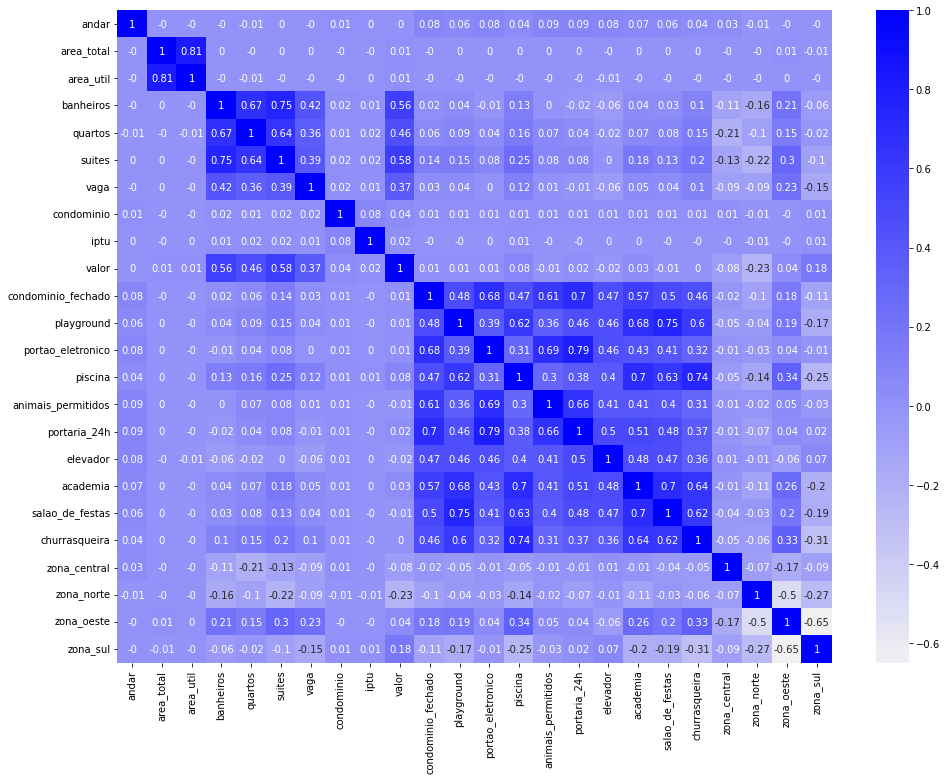

In [97]:
plt.figure(figsize= (16, 12))
sns.heatmap(df_correlation.round(2), annot= True, cmap= colors)
plt.show()

#Modelo de regressão com GBTRegressor

In [98]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [99]:
gbtr = GBTRegressor(featuresCol= 'features', labelCol= 'values')
gbtr = gbtr.fit(train_data)

In [100]:
mdata = gbtr.transform(test_data)
mdata.show(5)

+--------------------+---------+-----------------+
|            features|   values|       prediction|
+--------------------+---------+-----------------+
|(24,[0,1,2,3,4,5,...|4140000.0|4656703.578415878|
|(24,[0,1,2,3,4,5,...|4090000.0|4557334.430655067|
|(24,[0,1,2,3,4,5,...| 600000.0|  546410.69278282|
|(24,[0,1,2,3,4,5,...| 285000.0|289396.9098186219|
|(24,[0,1,2,3,4,5,...| 340000.0|306158.8206916629|
+--------------------+---------+-----------------+
only showing top 5 rows



In [101]:
rmse = RegressionEvaluator(labelCol= 'values', predictionCol= 'prediction', metricName= 'rmse')
f'O RMSE para este modelo é de: {rmse.evaluate(mdata)}'

'O RMSE para este modelo é de: 334166.4029991979'

In [102]:
r2 = RegressionEvaluator(labelCol= 'values', predictionCol= 'prediction', metricName= 'r2')
f'O RMSE para este modelo é de: {r2.evaluate(mdata)}'

'O RMSE para este modelo é de: 0.9605376680650533'